###  print out structures

In [1]:
import random
import numpy as np
import pprint
from graphviz import Digraph

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn
from mycrograd_debug.util_debug import (
    debugPrint,
    print_my_params,
    print_all_values,
    backupParameters,
    restoreParameters,
)

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

In [2]:
# loss function single MLP
def loss_single(target, output):
    # total_loss = (output - target)*(output - target)
    total_loss = output + target
    total_loss.type = "l"
    return total_loss

#### Multi Layer Perceptron 1-2-1

In [3]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, 2, nout], lastReLU=False, weightsinit=2, debug_bw=True
)  # 2-layer neural network
# print("parameters")
# pp.pprint(model.parameters())
# print_my_params(model)
print("layers")
pp.pprint(model.layers)
print(model.layers[0].layernumber)

xinumbers = list(range(1, 1 + nin))
xinput = [Value(x, type="i%s" % index) for index, x in enumerate(xinumbers, start=1)]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)
# activation.backward()
print("activation", activation)

Module nn MLP: structure [3, 2, 2, 1]
layers
[   Layer of [LinearNeuron(3), LinearNeuron(3)],
    Layer of [LinearNeuron(2), LinearNeuron(2)],
    Layer of [LinearNeuron(2)]]
L1
inputs
[   Value(name=v018,layernumber=,neuronnumber=,weightnumber=,type=i1,data=1, grad=0),
    Value(name=v019,layernumber=,neuronnumber=,weightnumber=,type=i2,data=2, grad=0),
    Value(name=v020,layernumber=,neuronnumber=,weightnumber=,type=i3,data=3, grad=0)]
activation Value(name=v044,layernumber=O,neuronnumber=N1,weightnumber=,type=a,data=12.600000000000003, grad=0)


#### Multi Layer Perceptron 3-4-4-1

In [4]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [4, 4, nout], lastReLU=False, weightsinit=2, debug_bw=False
)  # neural network
# print("parameters")
# print_my_params(model)

xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i%s" % index) for index, x in enumerate(xinumbers, start=1)]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)

# ys = [[1.0]]
xtarget = Value(1.2, type="t")  # desired targets

loss = loss_single(activation, xtarget)
# loss.backward()
print("loss= ", loss)
print("number of Value objects created = ", Value.value_counter)

# draw_dot(loss, debug_print_01=False)

Module nn MLP: structure [3, 4, 4, 1]
inputs
[   Value(name=v042,layernumber=,neuronnumber=,weightnumber=,type=i1,data=1, grad=0),
    Value(name=v043,layernumber=,neuronnumber=,weightnumber=,type=i2,data=2, grad=0),
    Value(name=v044,layernumber=,neuronnumber=,weightnumber=,type=i3,data=3, grad=0)]
loss=  Value(name=v110,layernumber=,neuronnumber=,weightnumber=,type=l,data=73.72000000000003, grad=0)
number of Value objects created =  110


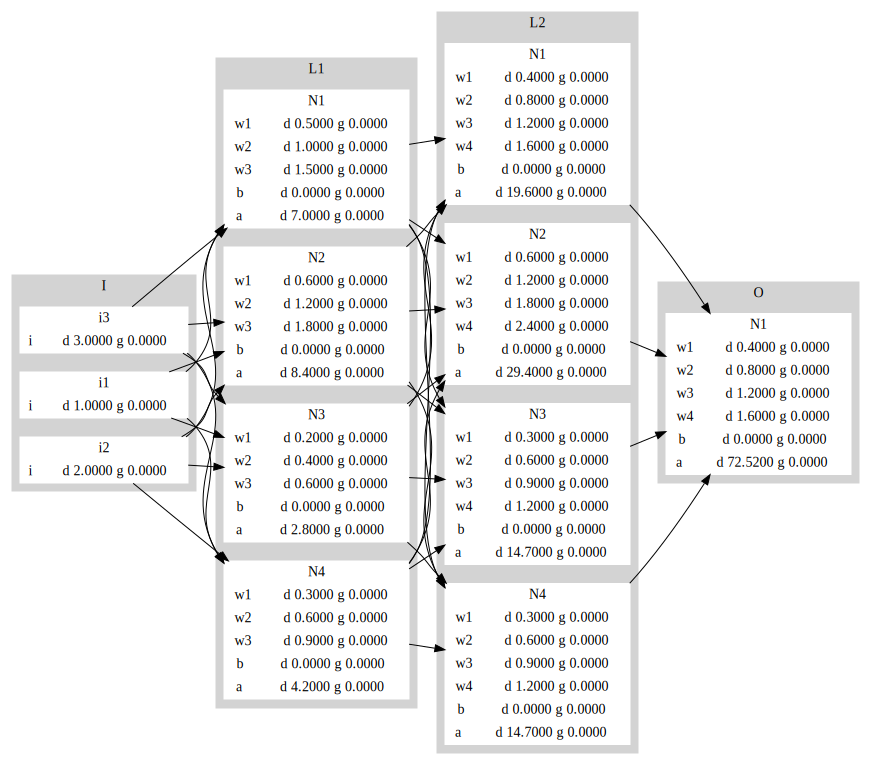

In [5]:
draw_nn(xinput, model)